1. Definisikan Variabel Linguistik dan Fungsi Keanggotaan:

- *Jarak:*
  - Dekat [0-4]
  - Sedang [2-8]
  - Jauh [6-10]

- *Waktu Reaksi Pengemudi:*
    - Lambat [0-100]
    - Sedang [50-150]
    - Cepat [100-200]

- *Kecepatan:*
    - Lambat [0-50]
    - Sedang [25-75]
    - Cepat [50-100]

2. *Definisikan Fungsi Keanggotaan:*
   Setiap variabel linguistik memerlukan fungsi keanggotaan untuk merepresentasikan fuzzy set.

3. *Aturan Fuzzy (Rules):*
   Gunakan aturan yang telah diberikan:
   - Jika Jarak DEKAT dan Waktu Reaksi Pengemudi LAMBAT, maka Kecepatan LAMBAT
   - Jika Jarak DEKAT dan Waktu Reaksi Pengemudi SEDANG, maka Kecepatan LAMBAT
   - Jika Jarak DEKAT dan Waktu Reaksi Pengemudi CEPAT, maka Kecepatan LAMBAT
   - Jika Jarak SEDANG dan Waktu Reaksi Pengemudi LAMBAT, maka Kecepatan LAMBAT
   - Jika Jarak SEDANG dan Waktu Reaksi Pengemudi SEDANG, maka Kecepatan SEDANG
   - Jika Jarak SEDANG dan Waktu Reaksi Pengemudi CEPAT, maka Kecepatan SEDANG
   - Jika Jarak JAUH dan Waktu Reaksi Pengemudi LAMBAT, maka Kecepatan SEDANG
   - Jika Jarak JAUH dan Waktu Reaksi Pengemudi SEDANG, maka Kecepatan CEPAT
   - Jika Jarak JAUH dan Waktu Reaksi Pengemudi CEPAT, maka Kecepatan CEPAT

4. *Implementasikan Sistem Fuzzy:*
   - *Fuzzifikasi:* Konversi input crisp (jarak dan waktu reaksi pengemudi) ke nilai fuzzy menggunakan fungsi keanggotaan.
   - *Inference (Inferensi):* Terapkan aturan fuzzy untuk menentukan output fuzzy.
   - *Defuzzifikasi:* Konversi output fuzzy menjadi nilai crisp untuk kecepatan.

In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=5893cb16556fe89002326f889155e39cf8fea0f73b658d8b96dccdd13ff877d3
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


## Library

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definisikan variabel linguistik

In [11]:
jarak = ctrl.Antecedent(np.arange(0, 11, 1), 'jarak')
waktu_reaksi = ctrl.Antecedent(np.arange(0, 201, 1), 'waktu_reaksi')
kecepatan = ctrl.Consequent(np.arange(0, 101, 1), 'kecepatan')

# Definisikan fungsi keanggotaan untuk jarak

In [12]:
jarak['dekat'] = fuzz.trimf(jarak.universe, [0, 0, 4])
jarak['sedang'] = fuzz.trimf(jarak.universe, [2, 5, 8])
jarak['jauh'] = fuzz.trimf(jarak.universe, [6, 10, 10])

# Definisikan fungsi keanggotaan untuk waktu reaksi

In [13]:
waktu_reaksi['lambat'] = fuzz.trimf(waktu_reaksi.universe, [0, 0, 100])
waktu_reaksi['sedang'] = fuzz.trimf(waktu_reaksi.universe, [50, 100, 150])
waktu_reaksi['cepat'] = fuzz.trimf(waktu_reaksi.universe, [100, 200, 200])

# Definisikan fungsi keanggotaan untuk kecepatan


In [14]:
kecepatan['lambat'] = fuzz.trimf(kecepatan.universe, [0, 0, 50])
kecepatan['sedang'] = fuzz.trimf(kecepatan.universe, [25, 50, 75])
kecepatan['cepat'] = fuzz.trimf(kecepatan.universe, [50, 100, 100])

# Definisikan aturan fuzzy

In [15]:
rule1 = ctrl.Rule(jarak['dekat'] & waktu_reaksi['lambat'], kecepatan['lambat'])
rule2 = ctrl.Rule(jarak['dekat'] & waktu_reaksi['sedang'], kecepatan['lambat'])
rule3 = ctrl.Rule(jarak['dekat'] & waktu_reaksi['cepat'], kecepatan['lambat'])
rule4 = ctrl.Rule(jarak['sedang'] & waktu_reaksi['lambat'], kecepatan['lambat'])
rule5 = ctrl.Rule(jarak['sedang'] & waktu_reaksi['sedang'], kecepatan['sedang'])
rule6 = ctrl.Rule(jarak['sedang'] & waktu_reaksi['cepat'], kecepatan['sedang'])
rule7 = ctrl.Rule(jarak['jauh'] & waktu_reaksi['lambat'], kecepatan['sedang'])
rule8 = ctrl.Rule(jarak['jauh'] & waktu_reaksi['sedang'], kecepatan['cepat'])
rule9 = ctrl.Rule(jarak['jauh'] & waktu_reaksi['cepat'], kecepatan['cepat'])

# Kumpulkan semua aturan

In [16]:
kecepatan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
kecepatan_simulasi = ctrl.ControlSystemSimulation(kecepatan_ctrl)

# Misalkan kita punya input jarak 3 dan waktu reaksi 120

In [17]:
kecepatan_simulasi.input['jarak'] = 3
kecepatan_simulasi.input['waktu_reaksi'] = 120

# Lakukan perhitungan defuzzifikasi

In [18]:
kecepatan_simulasi.compute()

# Cetak hasil kecepatan

In [19]:
print(f"Kecepatan: {kecepatan_simulasi.output['kecepatan']}")

Kecepatan: 37.93970209489418


# Plot hasil (opsional)

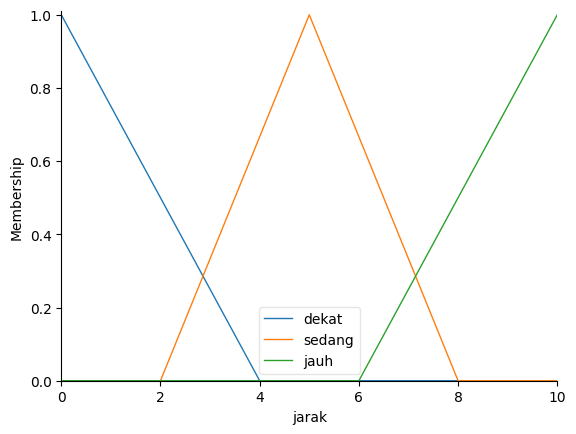

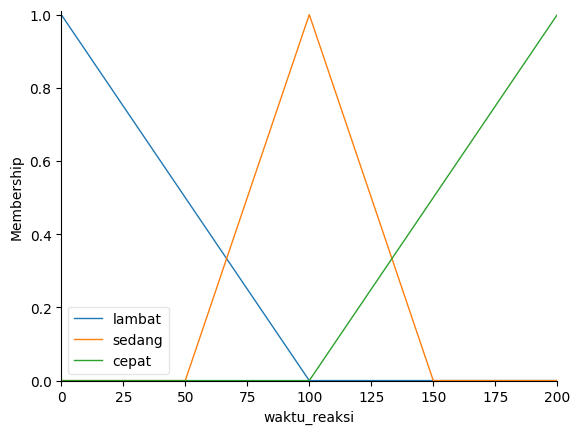

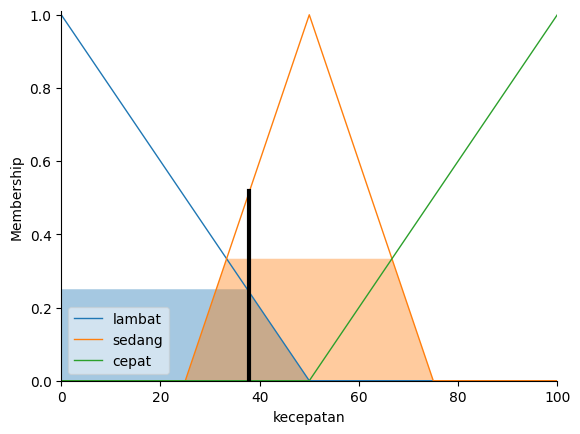

In [20]:
jarak.view()
waktu_reaksi.view()
kecepatan.view(sim=kecepatan_simulasi)


# Kesimpulan

Sistem pengendalian kecepatan menggunakan metode Fuzzy Tsukamoto efektif dalam menentukan kecepatan kendaraan berdasarkan input jarak dan waktu reaksi pengemudi. Visualisasi fungsi keanggotaan dan output kecepatan memberikan pemahaman yang jelas tentang bagaimana sistem bekerja dan bagaimana kecepatan yang dihasilkan dipengaruhi oleh perubahan input. Sistem ini dapat diimplementasikan dalam aplikasi nyata untuk meningkatkan keselamatan dan efisiensi dalam mengendalikan kecepatan kendaraan.